In [20]:
pip install matplotlib pandas reportlab

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

In [22]:
# Set visualization style
sns.set(style="whitegrid")

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
customers_path = "/content/drive/My Drive/data/Customers.csv"
transactions_path = "/content/drive/My Drive/data/Transactions.csv"

In [25]:
customers = pd.read_csv(customers_path)
transactions = pd.read_csv(transactions_path)

In [26]:
# Merge customer and transaction data
customer_data = transactions.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum"
}).reset_index()
customer_data = customer_data.merge(customers, on="CustomerID", how="left")

# Feature selection and scaling
features = customer_data[["TotalValue", "Quantity"]]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(features_scaled)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(features_scaled, customer_data["Cluster"])

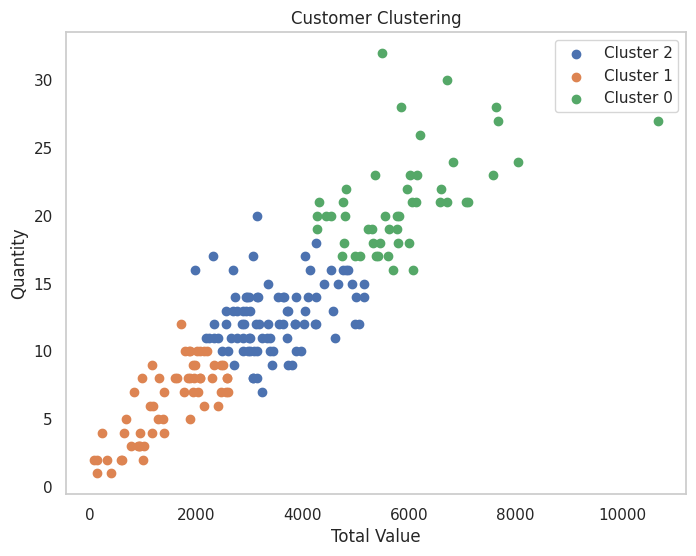

In [27]:
# --- Visualization ---
# Scatter plot for clusters
plt.figure(figsize=(8, 6))
for cluster_id in customer_data["Cluster"].unique():
    cluster_points = customer_data[customer_data["Cluster"] == cluster_id]
    plt.scatter(
        cluster_points["TotalValue"],
        cluster_points["Quantity"],
        label=f"Cluster {cluster_id}"
    )
plt.title("Customer Clustering")
plt.xlabel("Total Value")
plt.ylabel("Quantity")
plt.legend()
plt.grid()
plt.savefig("/content/drive/My Drive/outputs/clustering_plot.png")  # Save plot for use in the PDF
plt.show()


In [28]:
pdf_path = "/content/drive/My Drive/outputs/Sameer_Ahmed_Clustering.pdf"
pdf = canvas.Canvas(pdf_path, pagesize=letter)
pdf.setTitle("Customer Clustering Report")

# Title
pdf.setFont("Helvetica-Bold", 16)
pdf.drawString(100, 750, "Customer Clustering Report")

# DB Index
pdf.setFont("Helvetica", 12)
pdf.drawString(100, 720, f"Davies-Bouldin Index: {db_index:.2f}")

# Cluster Summary
pdf.drawString(100, 700, "Cluster Distribution:")
cluster_counts = customer_data["Cluster"].value_counts()
for i, (cluster, count) in enumerate(cluster_counts.items()):
    pdf.drawString(120, 680 - (i * 20), f"Cluster {cluster}: {count} customers")

# Add the saved plot to the PDF
pdf.drawImage("/content/drive/My Drive/outputs/clustering_plot.png", 100, 400, width=400, height=300)

# Save and close the PDF
pdf.save()

print(f"Clustering PDF report saved at {pdf_path}.")

Clustering PDF report saved at /content/drive/My Drive/outputs/Sameer_Ahmed_Clustering.pdf.
